## Import Packages

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import math

C:\Users\mandy\AppData\Local\Temp\ipykernel_16172\713177740.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('HW2_Mix.wav')


sample rate: 44100Hz
Data type: float32
(639794,)


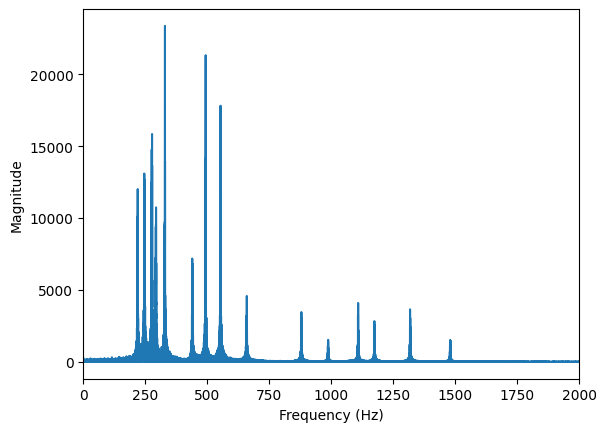

In [2]:
# Read the input file
sampling_rate, data = wavfile.read('HW2_Mix.wav')
print('sample rate: {}Hz'.format(sampling_rate))
print('Data type: {}'.format(data.dtype))
print(data.shape)
# apply Fast Fourier transform
fft_data = np.fft.fft(data)
# calculate the magnitude of the Fourier transform
magnitude = np.abs(fft_data)
freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

plt.plot(freq, magnitude[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.savefig('output/input.png')
plt.show()

## Filter design

In [3]:
def filter(f_c, f_samp, N, t):
    f_c = f_c / f_samp
    w_c = 2 * math.pi * f_c
    middle = int(N/2)

    fltr = np.zeros((N))
    # low-pass filter function 
    if t==1:
        halfN = int(N/2)
        for n in range(-halfN, halfN+1):
            if n==0: fltr[middle] = 2*f_c
            else: fltr[n+middle] = math.sin(2*math.pi*f_c*n) / (math.pi*n)

    # high-pass filter function
    elif t==2:
        halfN = int(N/2)
        for n in range(-halfN, halfN+1):
            if n == 0: fltr[middle] = 1 - 2*f_c
            else: fltr[n+middle] = -math.sin(2*math.pi*f_c*n) / (math.pi*n)
    else:
        fltr = 0
    
    # Use the Blackmann window function
    for n in range(0, N):
        fltr[n] = fltr[n] * (0.42 - 0.5*math.cos((2*math.pi*n)/(N-1)) + 0.08*math.cos((4*math.pi*n)/(N-1)))

    return fltr

In [4]:
def bandpass_filter(f_c1, f_c2, f_samp, N):
    f1 = f_c1 / f_samp
    f2 = f_c2 / f_samp
    w1 = 2 * math.pi * f1
    w2 = 2 * math.pi * f2
    middle = int(N/2)

    fltr = np.zeros((N))    
    halfN = int(N/2)
    for n in range(-halfN, halfN+1):
        if n==0: fltr[middle] = 2 * (f2-f1)
        else: fltr[n+middle] = fltr[n+middle] = (math.sin(w2*n) - math.sin(w1*n)) / (math.pi*n)
    
    # Use the Blackmann window function
    for n in range(0, N):
        fltr[n] = fltr[n] * (0.42 - 0.5*math.cos((2*math.pi*n)/(N-1)) + 0.08*math.cos((4*math.pi*n)/(N-1)))

    return fltr


## Seperate songs

C:\Users\mandy\AppData\Local\Temp\ipykernel_16172\3631618043.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('HW2_Mix.wav')


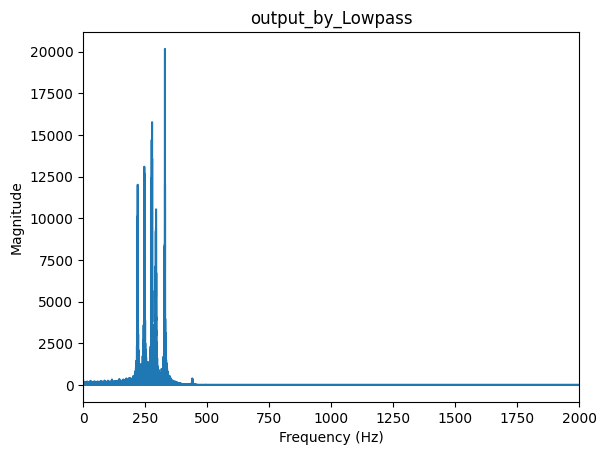

In [4]:
sampling_rate, data = wavfile.read('HW2_Mix.wav')
N = 999
mask1 = filter(375, sampling_rate, N, 1)
output_signal = np.zeros_like(data)
for n in range(len(data)):
    for k in range(len(mask1)):
        if n-k >= 0:
            output_signal[n] += mask1[k] * data[n-k]

filename = 'output/Lowpass_375.wav'
wavfile.write(filename, sampling_rate, output_signal.astype('float32'))

# plot spectrum
fft_data = np.fft.fft(output_signal)
magnitude = np.abs(fft_data)
freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

plt.plot(freq, magnitude[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.title('output_by_Lowpass')
plt.savefig('output/output_by_Lowpass.png')
plt.show()

C:\Users\mandy\AppData\Local\Temp\ipykernel_4420\2446201218.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('HW2_Mix.wav')


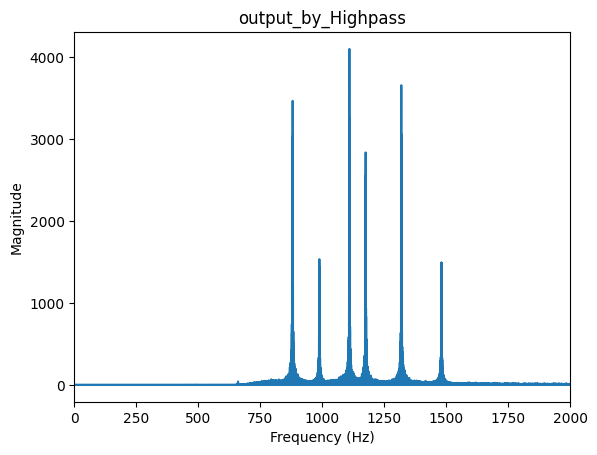

In [6]:
sampling_rate, data = wavfile.read('HW2_Mix.wav')
N = 999
mask2 = filter(750, sampling_rate, N, 2)
output_signal = np.zeros_like(data)
for n in range(len(data)):
    for k in range(len(mask2)):
        if n-k >= 0:
            output_signal[n] += mask2[k] * data[n-k]

filename = 'output/Highpass_750.wav'
wavfile.write(filename, sampling_rate, output_signal.astype('float32'))

# plot spectrum
fft_data = np.fft.fft(output_signal)
magnitude = np.abs(fft_data)
freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

plt.plot(freq, magnitude[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.title('output_by_Highpass')
plt.savefig('output/output_by_Highpass.png')
plt.show()

C:\Users\mandy\AppData\Local\Temp\ipykernel_4420\4265236927.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('HW2_Mix.wav')


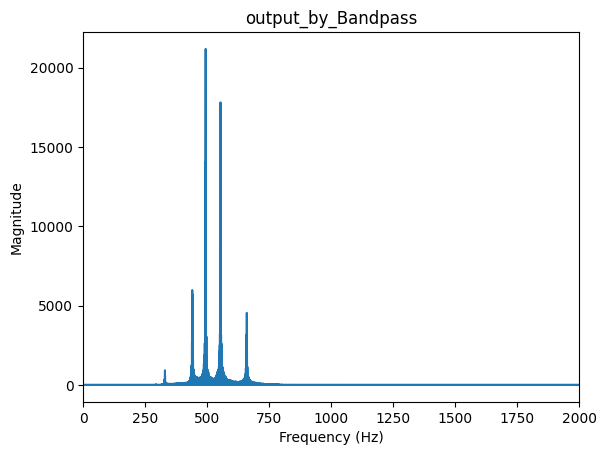

In [7]:
sampling_rate, data = wavfile.read('HW2_Mix.wav')
N = 999
mask3 = bandpass_filter(400, 750, sampling_rate, N)
output_signal = np.zeros_like(data)
for n in range(len(data)):
    for k in range(len(mask3)):
        if n-k >= 0:
            output_signal[n] += mask3[k] * data[n-k]

filename = 'output/Bandpass_400_750.wav'
wavfile.write(filename, sampling_rate, output_signal.astype('float32'))

# plot spectrum
fft_data = np.fft.fft(output_signal)
magnitude = np.abs(fft_data)
freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

plt.plot(freq, magnitude[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.title('output_by_Bandpass')
plt.savefig('output/output_by_Bandpass.png')
plt.show()

## Spectrum and shape of the filter

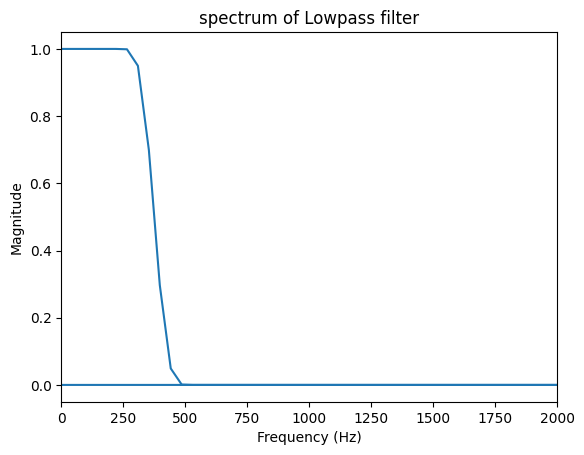

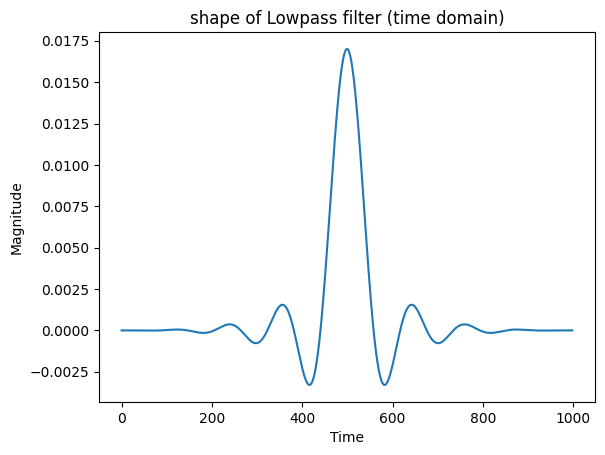

In [5]:
fft_data = np.fft.fft(mask1)
magnitude = np.abs(fft_data)
freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

plt.plot(freq, magnitude[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.title('spectrum of Lowpass filter')
plt.savefig('output/Lowpass_spectrum.png')
plt.show()

plt.plot(mask1)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('shape of Lowpass filter (time domain)')
plt.savefig('output/Lowpass_shape.png')
plt.show()

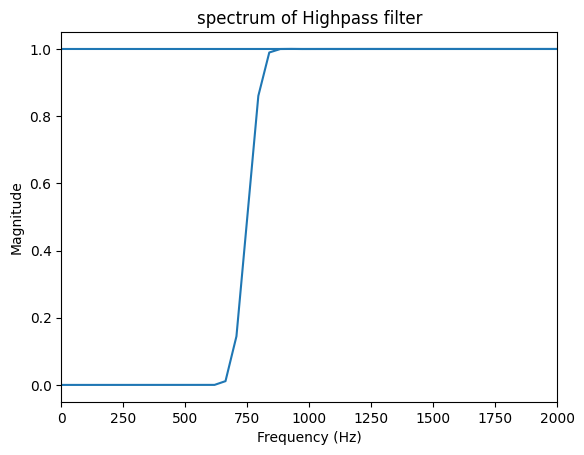

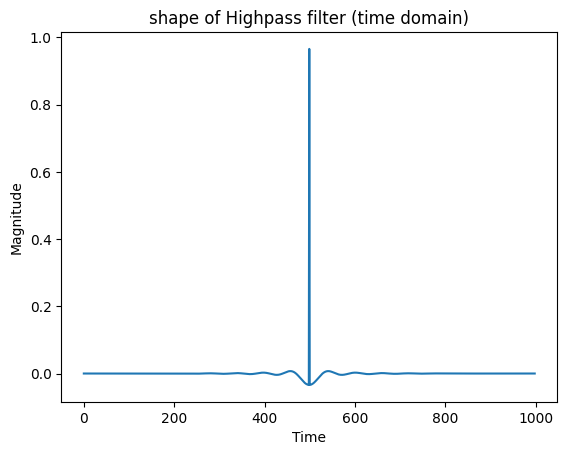

In [63]:
fft_data = np.fft.fft(mask2)
magnitude = np.abs(fft_data)
freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

plt.plot(freq, magnitude[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.title('spectrum of Highpass filter')
plt.savefig('output/Highpass_spectrum.png')
plt.show()

plt.plot(mask2)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('shape of Highpass filter (time domain)')
plt.savefig('output/Highpass_shape.png')
plt.show()

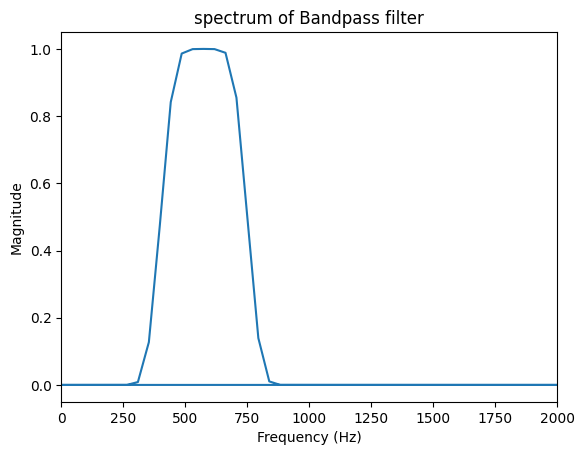

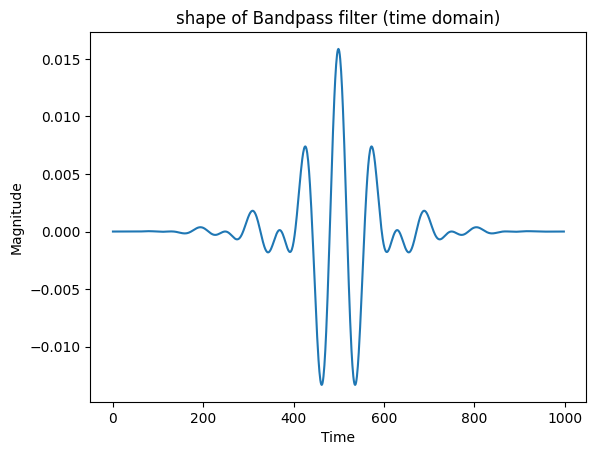

In [64]:
fft_data = np.fft.fft(mask3)
magnitude = np.abs(fft_data)
freq = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)

plt.plot(freq, magnitude[:len(freq)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.title('spectrum of Bandpass filter')
plt.savefig('output/Bandpass_spectrum.png')
plt.show()

plt.plot(mask3)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('shape of Bandpass filter (time domain)')
plt.savefig('output/Bandpass_shape.png')
plt.show()

## Reduce sample rate

In [28]:
input_audio = ['output/Lowpass_375.wav',
               'output/Highpass_750.wav', 
               'output/Bandpass_400_750.wav']
output_audio = ['output/Lowpass_375_2kHZ.wav', 
                'output/Highpass_750_2kHZ.wav', 
                'output/Bandpass_400_750_2kHZ.wav']

for n in range(3):
    fs, data = wavfile.read(input_audio[n])
    ratio = fs / 2000
    ratio = int(np.ceil(ratio))

    # Create an empty array to store the resampled song
    resampled_song = np.zeros((len(data) // ratio), dtype=np.float32)

    # Perform the resampling by averaging over each block of samples
    for i in range(resampled_song.shape[0]):
        resampled_song[i] = np.mean(data[i*ratio:(i+1)*ratio])
    wavfile.write(output_audio[n], 2000, resampled_song.astype('float32'))

## Echo

In [44]:
input_audio = 'output/Lowpass_375.wav'
output_audio = 'output/Echo_one.wav'

fs, data = wavfile.read(input_audio)
echo_song = np.zeros((len(data)))

for i in range(len(data)):
    echo_song[i] = data[i] + 0.8*data[i-3200]

wavfile.write(output_audio, fs, echo_song.astype('float32'))

In [42]:
input_audio = 'output/Lowpass_375.wav'
output_audio = 'output/Echo_multiple.wav'

fs, data = wavfile.read(input_audio)
echo_song2 = np.zeros((len(data)), dtype=np.float32)
for i in range(len(data)):
    echo_song2[i] = data[i] + 0.8*echo_song2[i-3200]

wavfile.write(output_audio, fs, echo_song2.astype('float32'))